# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


From a dataset that contains 32x32px images of German traffic signs from 43 classes, we will create, train and test a classifier model.

This notebook will consist of 3 parts:

#### 1. Loading and exploring the data.
#### 2. Building, Training and testing a model.
#### 3. Applying the model to new images outside the original data set.


---
## Step 0: Load The Data

In [1]:
### Dependencies

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random
from random import randrange

import tensorflow as tf


In [2]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/test.p'
testing_file = 'traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

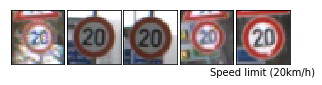

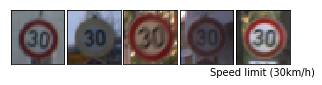

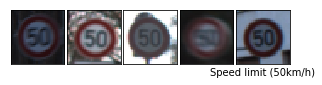

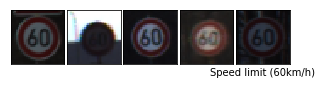

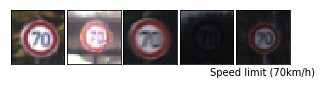

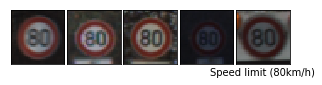

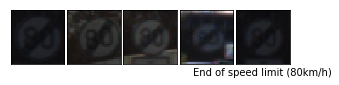

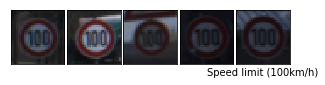

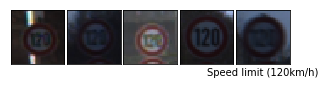

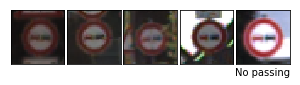

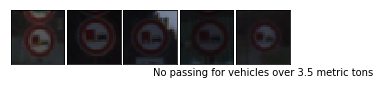

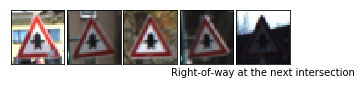

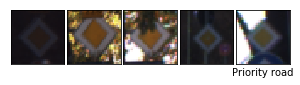

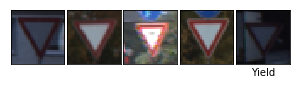

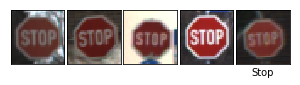

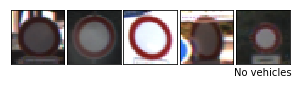

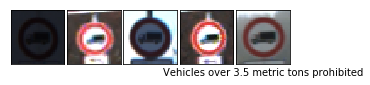

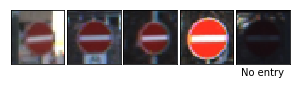

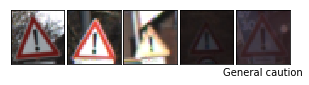

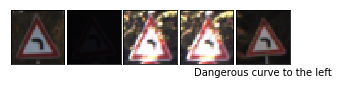

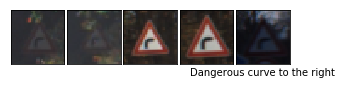

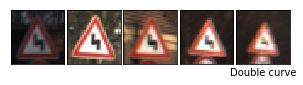

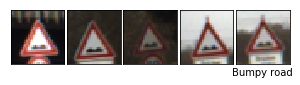

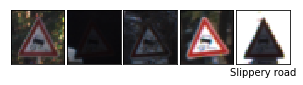

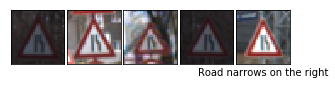

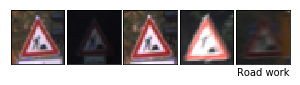

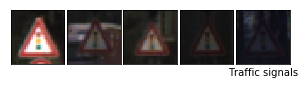

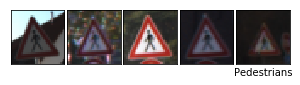

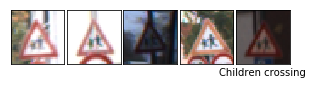

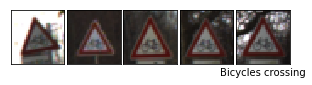

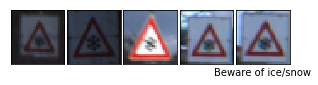

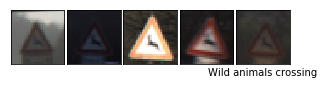

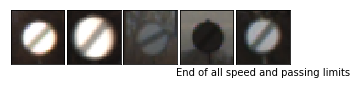

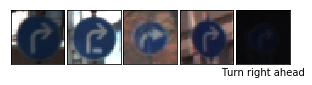

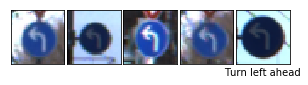

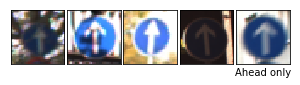

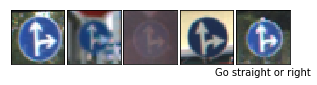

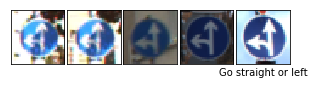

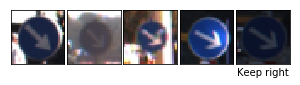

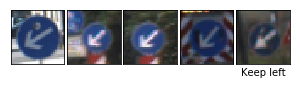

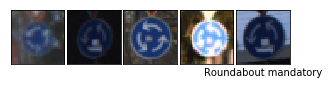

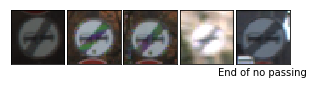

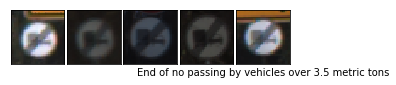

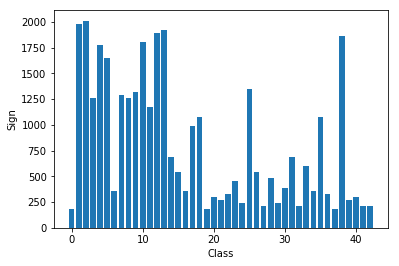

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random
from random import randrange


import csv
reader = csv.reader(open('signnames.csv', 'r'))
signnames = {}
for row in reader:
    k, v = row
    signnames[k] = v
    
def categorize(array):
    d = {}
    for im, label in array:
        a = d.get(label,[])
        a.append(im)
        d[label] = a
    return d

zipped = zip(X_train, y_train)

cats = categorize(zipped)

for key in cats:
    fig, axes = plt.subplots(1, 5, figsize=(5, 5), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.05)

    samples = random.sample(cats[key],5)
    
    for i in range(0,5):
        ax = axes[i]
        ax.imshow(samples[i])
    plt.xlabel(signnames[str(key)])
    plt.xticks([])
    plt.show()
    
_ , counts = np.unique(y_train, return_counts=True)

plt.bar( np.arange( 43 ), counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Sign')
plt.show()
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Pre processing and augmentation

# not implemented. Disregard.
def augment(im):
    return im

### Pre process an image
def pre_process(im):
    #Scale features to be in [-0.5, 0.5]
    X = (im / 255. - 0.5).astype(np.float32)
    return X

### Pre process an ndarray (we assume of shape = (?,32,32,3) )
def pre_process_data(array):
    processed = []
    for im in array:
        processed.append(pre_process(im))
    return np.asarray(processed, dtype=np.float32)


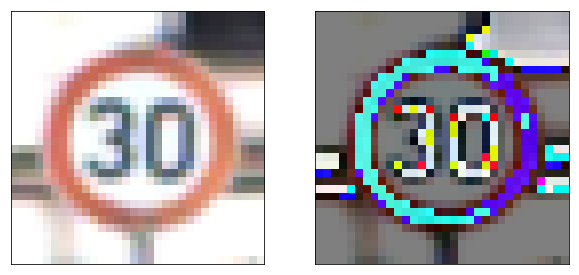

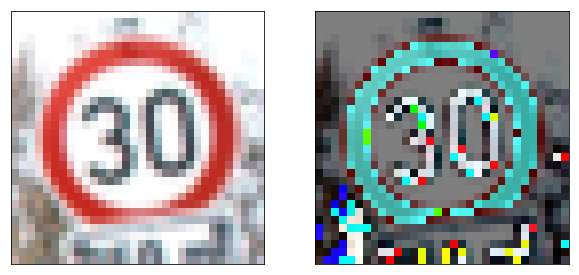

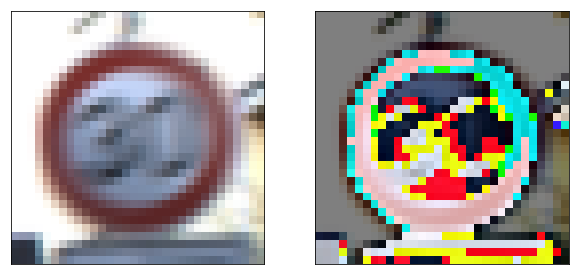

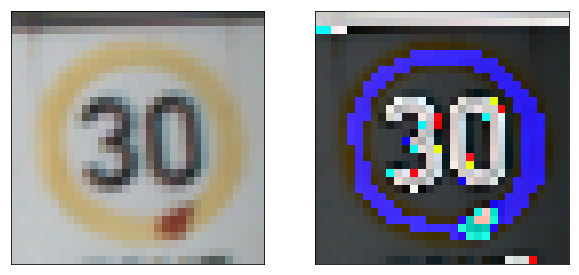

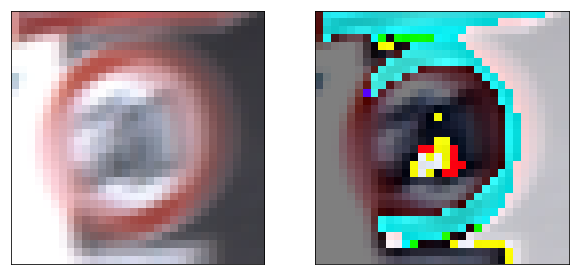

In [6]:
### visualise pre processing

samples = random.sample(cats[1],5)
for i in range(0,5):
    fig, axes = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
    ax = axes[0]
    image = samples[i]
    ax.imshow(image)
    pp = pre_process(image)
    axes[1].imshow(pp)

plt.xticks([])
plt.show()



### Model Architecture

In [7]:
from tensorflow.contrib.layers import flatten


def ConvNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x36.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 36), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(36))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x36. Output = 14x14x36.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x36 Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 36, 42), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(42))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x42. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x42. Output = 1050.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1050. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1050, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1   = tf.nn.relu(fc1)
    
    # dropout
    fc1 = tf.nn.dropout(fc1, 0.75)


    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b


    # Activation.
    fc2    = tf.nn.relu(fc2)
    

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
import os

### Place Holders

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Data sets

X_train_processed = pre_process_data(X_train)
X_valid_processed = pre_process_data(X_valid)
X_test_processed = pre_process_data(X_test)

### Hyper parameters

EPOCHS = 40
BATCH_SIZE = 128
learning_rate = 0.001

### Model / Logits

model_save_path = './models/convnetmodel'
if not os.path.exists('./models'):
    os.makedirs('./models')

logits = ConvNet(x)

### Training operations

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

### Evaluating operations

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



saver = tf.train.Saver()



### Training

In [9]:
from sklearn.utils import shuffle

### Training

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        a, b = shuffle(X_train_processed, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = a[offset:end], b[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        
        
    saver.save(sess, model_save_path)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.781

EPOCH 2 ...
Validation Accuracy = 0.854

EPOCH 3 ...
Validation Accuracy = 0.872

EPOCH 4 ...
Validation Accuracy = 0.898

EPOCH 5 ...
Validation Accuracy = 0.903

EPOCH 6 ...
Validation Accuracy = 0.913

EPOCH 7 ...
Validation Accuracy = 0.919

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.933

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.928

EPOCH 15 ...
Validation Accuracy = 0.926

EPOCH 16 ...
Validation Accuracy = 0.936

EPOCH 17 ...
Validation Accuracy = 0.934

EPOCH 18 ...
Validation Accuracy = 0.937

EPOCH 19 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.927

EPOCH 22 ...
Validation Accuracy = 0.940

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 24 ...
Validation Accura

### Testing

In [10]:
### Testing

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, model_save_path)
    a = evaluate(X_test_processed,y_test)
    print('accuracy against test set')
    print(a)



accuracy against test set
0.951020408163


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

./new_signs/rightofwaynextintersection.jpg
./new_signs/70mph.jpg
./new_signs/roadworks.jpg
./new_signs/priorityroad.jpg
./new_signs/general_caution.jpg


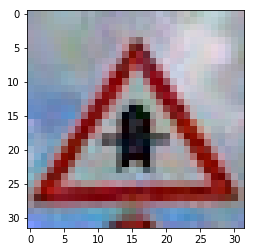

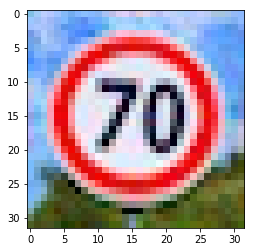

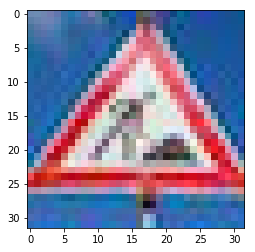

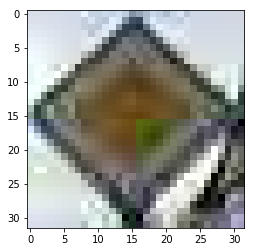

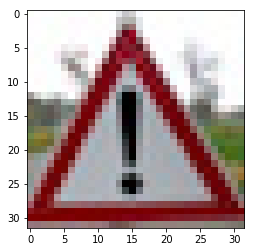

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob

new_images = []
for fn in glob.glob('./new_signs/*.jpg'):
    print (fn)
    im = mpimg.imread(fn)
    new_images.append(im)

for im in new_images:
    plt.imshow(im)
    plt.show()




### Predict the Sign Type for Each Image

### Analyze Performance

In [12]:
### Performance of model on outside data

new_images_processed = pre_process_data(new_images)

new_image_labels = np.array([11,4,25,12,18])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, model_save_path)
    a = evaluate(new_images_processed,new_image_labels)
    print('prediction performance on 5 new images:')
    print(a)



prediction performance on 5 new images:
1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

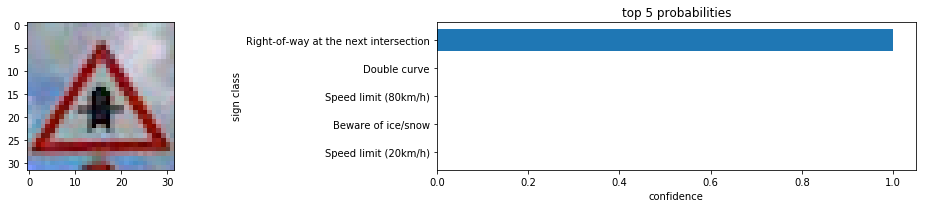

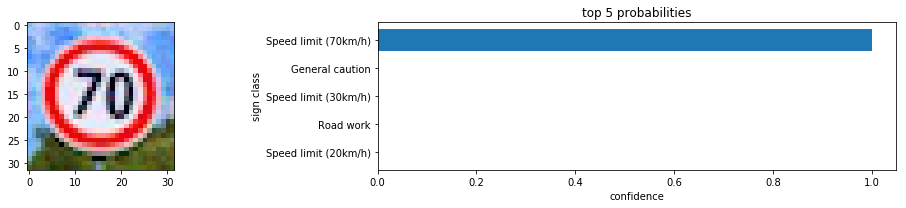

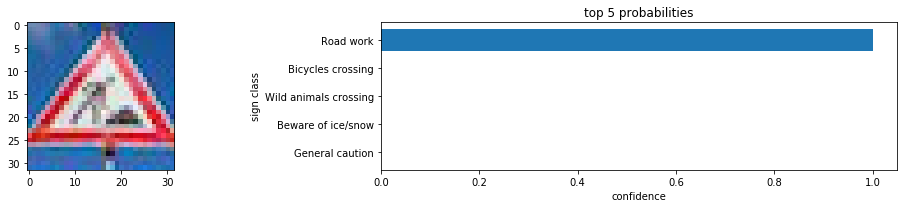

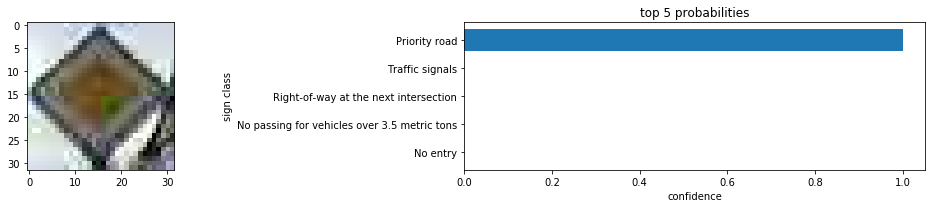

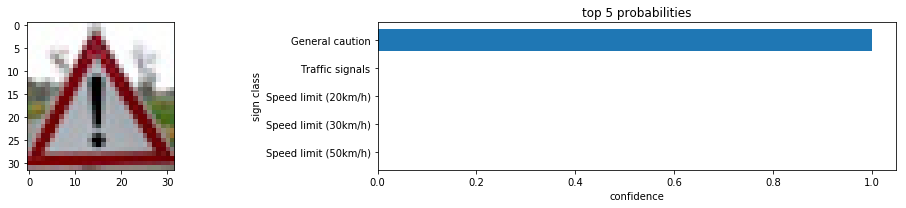

In [14]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, model_save_path)
    prediction = sess.run(tf.nn.top_k(softmax,5), feed_dict={x:new_images_processed})
    for i in range(0,len(new_images_processed)):
        
        fig, axes = plt.subplots(1, 2, figsize=(15,3))
        fig.subplots_adjust(hspace=0.3, wspace=0.05)

        names = []
        
        for j in prediction[1][i]:
            names.append(signnames[str(j)])
        predictions = prediction[0][i]

        axes[0].imshow(new_images[i])
        ax = axes[1]
        y_pos = np.arange(len(names))
        ax.barh(y_pos, predictions, align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(names)
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('confidence')
        ax.set_ylabel('sign class')
        ax.set_title('top 5 probabilities')

        plt.tight_layout()
        plt.show()


### Thanks